# Done by Dhruval J. Shah (19DCS124)


In [ ]:
# Pandas is used for data manipulation (primarily reading-writing dataset)
import pandas as pd

# Read in data and display first 5 rows for verification
features=pd.read_csv('temps.csv')
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [ ]:
print("The shape of dataset : ",features.shape)

The shape of dataset :  (348, 12)


In [ ]:
# Description statistics for each column
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [ ]:
# Converting day-month-year to datetime object
import datetime

#Getting year, month, day
years=features['year']
months=features['month']
days=features['day']
#print(years,months,days)

0      2016
1      2016
2      2016
3      2016
4      2016
       ... 
343    2016
344    2016
345    2016
346    2016
347    2016
Name: year, Length: 348, dtype: int64 0       1
1       1
2       1
3       1
4       1
       ..
343    12
344    12
345    12
346    12
347    12
Name: month, Length: 348, dtype: int64 0       1
1       2
2       3
3       4
4       5
       ..
343    27
344    28
345    29
346    30
347    31
Name: day, Length: 348, dtype: int64


In [ ]:
#Using list comprehension to convert to datetime object
dates=[str(year)+'-'+str(month)+'-'+str(day)for year,month,day in zip(years,months,days)]
dates=[datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

## Data Visualisation of Raw Data

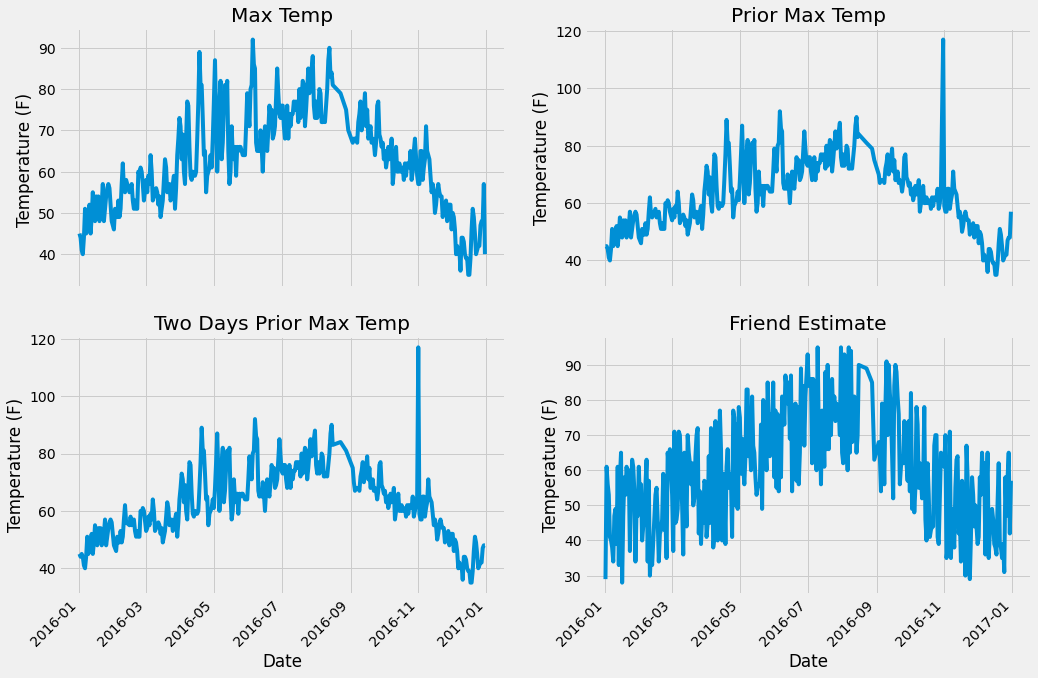

In [ ]:
#Setting the plot layout
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
fig.autofmt_xdate(rotation=45)

#Actual max temperature measurement
ax1.plot(dates,features['actual'])
ax1.set_xlabel('')
ax1.set_ylabel('Temperature (F) ')
ax1.set_title('Max Temp')

ax2.plot(dates,features['temp_1'])
ax2.set_xlabel('')
ax2.set_ylabel('Temperature (F)')
ax2.set_title('Prior Max Temp')

ax3.plot(dates,features['temp_2'])
ax3.set_xlabel('Date')
ax3.set_ylabel('Temperature (F)')
ax3.set_title('Two Days Prior Max Temp')

ax4.plot(dates,features['friend'])
ax4.set_xlabel('Date')
ax4.set_ylabel('Temperature (F)')
ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

## Data Cleaning

In [ ]:
# One hot encoding of data
features=pd.get_dummies(features)

#Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [ ]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels=np.array(features['actual'])


# Remove the labels from features axis 1 refers to columns
features=features.drop('actual',axis=1)

# Saving features names for later use
feature_list=list(features.columns)

# Convert to numpy array
features=np.array(features)

In [ ]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels=train_test_split(features,labels,test_size=0.25,random_state=42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


### Establish Baseline
We're going to establish a baseline (bare minimum goal if we don't achieve any improvement upon baseline then model would be considered failure)

In [ ]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


# Train Model

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

# Make Predictions

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.87 degrees.


Our average is 3.87 degrees is more than a 1 degree average improvement over the baseline. It is nearly 25% better than the baseline.

# Determine Performance Metrics

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.93 %.
